
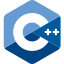
<br>

<div style="text-align:center; font-size:200%;">
  <b>SOLID: Open-Closed Principle</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 04 SOLID Open-Closed Principle.ipynb -->
<!-- slides/module_500_solid_grasp/topic_330_solid_ocp.cpp -->


# Open-Closed Principle (SOLID)

Classes should be

- Open for extension
- Closed for Modification

In [ ]:
enum class MovieKindV0
{
    Regular,
    Children,
};

In [ ]:
#include <iostream>

In [ ]:
class MovieV0
{
public:
    explicit MovieV0(std::string title, MovieKindV0 kind = MovieKindV0::Regular)
        : title_(std::move(title)), kind_(kind)
    {}

    std::string GetTitle() const { return title_; }
    MovieKindV0 GetKind() const { return kind_; }

    double ComputePrice() const
    {
        switch (kind_) {
        case MovieKindV0::Regular: return 4.99;
        case MovieKindV0::Children: return 5.99;
        default: return 0.0;
        }
    }

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    MovieKindV0 kind_;
};

In [ ]:
MovieV0 m1("Casablanca");
MovieV0 m2("Shrek", MovieKindV0::Children);

In [ ]:
m1.PrintInfo();
m2.PrintInfo();


<img src="img/movie_v0.svg" alt="MovieV0"
     style="display:block;margin:auto;width:50%"/>



What happens if we want to add a new movie kind?

In [ ]:
enum class MovieKind
{
    Regular,
    Children,
    NewRelease,
};

In [ ]:
class MovieV1
{
public:
    explicit MovieV1(std::string title, MovieKind kind = MovieKind::Regular)
        : title_(std::move(title)), kind_(kind)
    {}

    std::string GetTitle() const { return title_; }
    MovieKind GetKind() const { return kind_; }

    double ComputePrice() const
    {
        switch (kind_) {
        case MovieKind::Regular: return 4.99;
        case MovieKind::Children: return 5.99;
        case MovieKind::NewRelease: return 6.99;
        }
        return 0.0;
    }

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
    MovieKind kind_;
};

In [ ]:
MovieV1 m1("Casablanca");
MovieV1 m2("Shrek", MovieKind::Children);
// MovieV1 m3("Brand New", MovieKind::NewRelease);

In [ ]:
m1.PrintInfo();
m2.PrintInfo();
// m3.PrintInfo();


<img src="img/movie_v1.svg" alt="MovieV1"
     style="display:block;margin:auto;width:50%"/>


## OCP Violation

- New movie kinds require changes to `MovieV1`
- `MovieV1` is not closed for modification


## Solution (Attempt 1: Inheritance)

- New movie kinds are implemented as new classes
- `MovieV2` is abstract
- `MovieV2` is closed for modification

In [ ]:
class MovieV2
{
public:
    explicit MovieV2(std::string title) : title_(std::move(title)) {}
    MovieV2(const MovieV2&) = delete;
    MovieV2& operator=(const MovieV2&) = delete;
    MovieV2(MovieV2&&) = delete;
    MovieV2& operator=(MovieV2&&) = delete;
    virtual ~MovieV2() = default;

    std::string GetTitle() const { return title_; }

    virtual double ComputePrice() const = 0;

    void PrintInfo() const
    {
        std::cout << title_ << " costs " << ComputePrice() << std::endl;
    }

private:
    std::string title_;
};

In [ ]:
class RegularMovie : public MovieV2
{
public:
    explicit RegularMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 4.99; }
};

In [ ]:
class ChildrenMovie : public MovieV2
{
public:
    explicit ChildrenMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 5.99; }
};

In [ ]:
class NewReleaseMovie : public MovieV2
{
public:
    explicit NewReleaseMovie(std::string title) : MovieV2(std::move(title)) {}

    double ComputePrice() const override { return 6.99; }
};

In [ ]:
RegularMovie m1("Casablanca");
ChildrenMovie m2("Shrek");
NewReleaseMovie m3("Brand New");

In [ ]:
m1.PrintInfo();
m2.PrintInfo();
m3.PrintInfo();

In [ ]:
const MovieV2* movie{&m1};
movie->PrintInfo();
movie = &m2;
movie->PrintInfo();
movie = &m3;
movie->PrintInfo();


<img src="img/movie_v2.svg" alt="MovieV0"
     style="display:block;margin:auto;width:100%"/>


- `MovieV2` is open for extension
- New movie kinds can be added without changing the existing classes
- But: The inheritance hierarchy covers the whole class
  - Only one kind of variability
- What if we need a different classification for other purposes?
  - E.g. DVD, BluRay, Online?
- Multiple inheritance?
- Product of classes?
  - `ChildrenDVD`, `ChildrenBluRay`, `ChildrenOnline`, ...


- The strategy pattern allows us to apply inheritance to smaller parts of the
  class
- In almost all cases, this is the better solution!
- Inheritance is a very powerful tool
- But the smaller and more local we keep our inheritance hierarchies, the
  better


## Workshop: Smart Home Device Control System

In this workshop, we'll be working with a scenario involving a smart home
device control system. The challenge? The existing system violates the OCP,
and it's up to us to correct that.


### Scenario

Imagine a smart home system. This system controls various devices: lights,
thermostats, security cameras, and smart locks. Each type of device has its
own unique control mechanism and automation rules.

Now, the smart home's control system needs to manage these devices. The
problem with the current system is its use of an enum to determine the
device type and, based on that, its control method. This approach is not
scalable and violates the OCP. What happens when a new type of smart device
is added to the home? Or what if the control mechanism for thermostats
changes? The current code structure will require modification in multiple places.

In [ ]:
#include <iostream>
#include <string>

In [ ]:
enum class DeviceType
{
    Light,
    Thermostat,
    SecurityCamera,
    SmartLock
};

In [ ]:
class DeviceV0
{
public:
    DeviceV0(DeviceType type) : type_(type) {}

    std::string Control()
    {
        switch (type_) {
        case DeviceType::Light: return "Turning light on/off.";
        case DeviceType::Thermostat: return "Adjusting temperature.";
        case DeviceType::SecurityCamera: return "Activating motion detection.";
        case DeviceType::SmartLock: return "Locking/Unlocking door.";
        default: return "Unknown device control!";
        }
    }

    std::string GetStatus() const
    {
        switch (type_) {
        case DeviceType::Light: return "Light is on/off.";
        case DeviceType::Thermostat: return "Current temperature: 22°C.";
        case DeviceType::SecurityCamera: return "Camera is active/inactive.";
        case DeviceType::SmartLock: return "Door is locked/unlocked.";
        default: return "Unknown device status!";
        }
    }

private:
    DeviceType type_;
};

In [ ]:
std::vector<DeviceV0> devicesOriginal = {
    DeviceV0{DeviceType::Light}, DeviceV0{DeviceType::Thermostat}, DeviceV0{DeviceType::SecurityCamera}};

In [ ]:
void ManageDevices(std::vector<DeviceV0>& devices)
{
    for (DeviceV0& device : devices) {
        std::cout << device.Control() << " " << device.GetStatus() << "\n";
    }
}

In [ ]:
ManageDevices(devicesOriginal);


- Resolve the problem with the OCP violation in the existing code
- You can either modify the existing code or create a new solution from
  scratch

In [ ]:
#include <iostream>
#include <string>
#include <vector>
#include <memory>

In [ ]:
class Device
{
public:
    Device() = default;
    virtual ~Device() = default;

    virtual std::string Control() = 0;
    virtual std::string GetStatus() const = 0;
};

In [ ]:
class Light : public Device
{
public:
    std::string Control() override { return "Turning light on/off."; }
    std::string GetStatus() const override { return "Light is on/off."; }
};

In [ ]:
class Thermostat : public Device
{
public:
    std::string Control() override { return "Adjusting temperature."; }
    std::string GetStatus() const override { return "Current temperature: 22°C."; }
};

In [ ]:
class SecurityCamera : public Device
{
public:
    std::string Control() override { return "Activating motion detection."; }
    std::string GetStatus() const override { return "Camera is active/inactive."; }
};

In [ ]:
class SmartLock : public Device
{
public:
    std::string Control() override { return "Locking/Unlocking door."; }
    std::string GetStatus() const override { return "Door is locked/unlocked."; }
};

In [ ]:
std::vector<std::unique_ptr<Device>> devicesRefactored{};
devicesRefactored.push_back(std::make_unique<Light>());
devicesRefactored.push_back(std::make_unique<Thermostat>());
devicesRefactored.push_back(std::make_unique<SecurityCamera>());

In [ ]:
void ManageDevices(std::vector<std::unique_ptr<Device>>& devices) {
    for (auto& device : devices) {
        std::cout << device->Control() << " " << device->GetStatus() << "\n";
    }
}

In [ ]:
ManageDevices(devicesRefactored);